# P2 Analyzing Data from Titanic Disaster
I choose the Titanic disaster data set since as a German I am not so familiar with baseball.

# Questions to be asked
The dataset provides information on the survival of the passengers included. Therefore, it is naturally an interesting question to ask if the data set contains any hints that some subgroup of people did more likely survived the disaster than others.

Another question is how much the passengers paid in the various passengers classes. 

## The dataset
The dataset provided contains 891 entries representing 891 of the 2224 passengers and crew on board the Titanic. Since I could not find more information on the subset of passengers the data has been taken from I assume that the sample is representative for all passengers, when I draw my conclusions.

The survived flag indicates whether the respective person did survive. 62 % of the passengers, i.e. 549, did not survive the disaster.

In [2]:
# Importing libraries, general settings
import pandas as pd
import csv 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [5]:
#Importing the data
fulldata = pd.read_csv("titanic-data.csv")
print "Number of rows:", len(fulldata)
print "Columns"
print fulldata.columns
n_passengers = len(fulldata)
print n_passengers


Number of rows: 891
Columns
Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')
891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In the following I check all the columns for strange data

In [7]:
# Print information on dataset:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
Survived:  342 , died:  549  (61.62 %)


array([549, 342], dtype=int64)

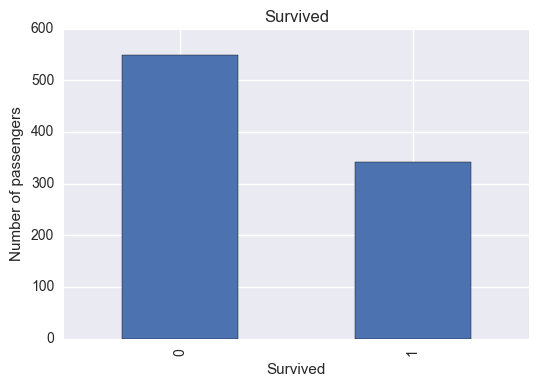

In [8]:
# Function to print column description and show histogram for a given column of a given dataframe
def investigateColumn(df, columnName, nbins=10):
    print df[columnName].describe()
    plt.title(columnName)
    plt.xlabel(columnName)
    plt.ylabel("Number of passengers")
    if df[columnName].dtype <> np.float64:
        df.groupby(columnName).count()["PassengerId"].plot(kind="bar")
    else:
        df[columnName].plot(kind="hist", bins=nbins)

investigateColumn(fulldata, "Survived")

# Calculate number of survivors
n_died = fulldata.groupby("Survived").count()["PassengerId"].values[0]
n_survived = fulldata.groupby("Survived").count()["PassengerId"].values[1]
print "Survived: ", n_survived, ", died: ", n_died, " (%.2f %%)" % (n_died*100./n_passengers)
fulldata.groupby("Survived").count()["PassengerId"].values

In [ ]:
investigateColumn(fulldata, "Pclass")

In [6]:
print "First passenger's name: ", fulldata["Name"][0]
fulldata["Name"].describe()

First passenger's name:  Braund, Mr. Owen Harris


count                           891
unique                          891
top       Graham, Mr. George Edward
freq                              1
Name: Name, dtype: object

# Sex
The dataset contains data from 577 men and 314 women. 

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object
['male' 'female']
Number of female passengers: 314


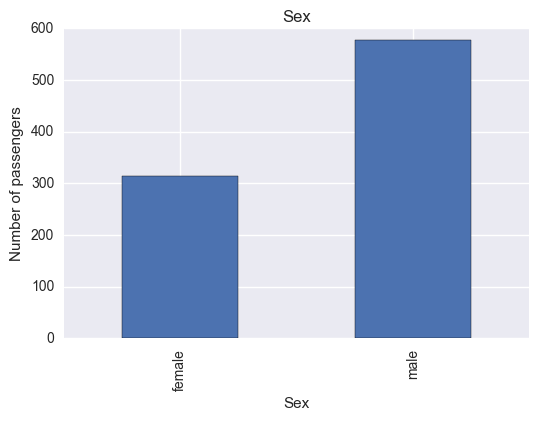

In [7]:
investigateColumn(fulldata, "Sex")

# Check that all passengers have an assigned sex
print fulldata["Sex"].unique()

# Count female passengers
print "Number of female passengers:", fulldata[fulldata["Sex"]=="female"]["Sex"].count()


## Age
For 177 passengers (20 %) the age is missing. It looks a bit suspicious, that there is only one passenger age 23. This might be due to the selection of the subset of passengers but I was not able to find out more details about the subset. The mean age of the passengers is 29.7 years, while the mode is 24 (both calculated neglecting missing ages).

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64


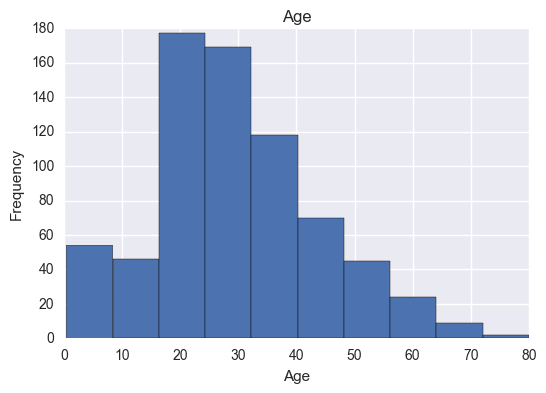

In [33]:
n_bins = int(math.ceil(fulldata["Age"].max()+1))
investigateColumn(fulldata, "Age")

In [35]:
print fulldata["Age"].describe()
n_missing_age = len(fulldata[fulldata["Age"].isnull()]["Age"])
print "Number of passengers with age missing: %.0f (%.2f %%)" % (n_missing_age, n_missing_age*100./len(fulldata) )

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64
Number of passengers with age missing: 177 (19.87 %)


## Relatives
The dataset provides information about the number of relatives on board the Titanic. Only parents, children, siblings and spouse have been taken into account to build the data according to the description of the dataset.

Most of the passengers were traveling without spouse or close relatives, according to the data.

Source: https://www.kaggle.com/c/titanic/data

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


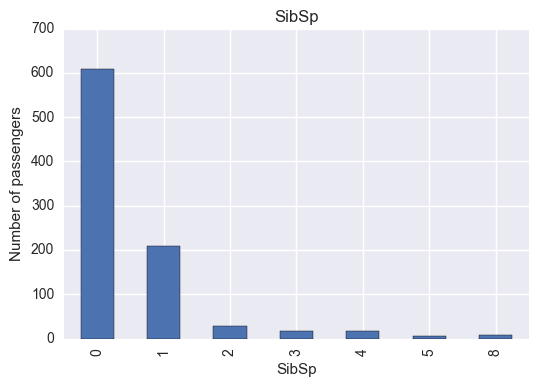

In [10]:
investigateColumn(fulldata, "SibSp")

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


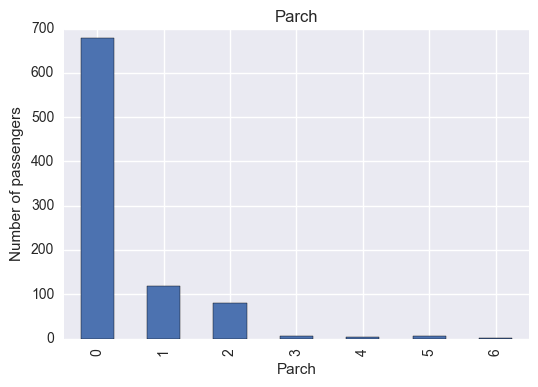

In [11]:
investigateColumn(fulldata, "Parch")

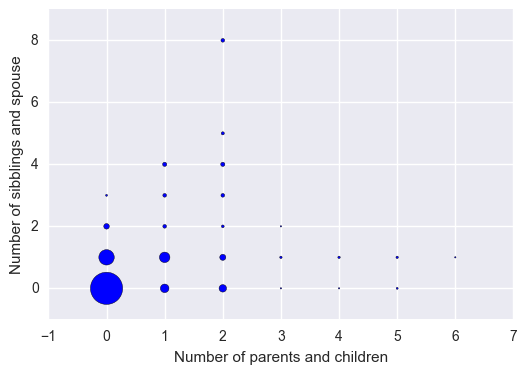

In [12]:
n_per_sibsp_parch = fulldata.groupby(["Parch", "SibSp"], as_index=False).count()
plt.xlabel("Number of parents and children")
plt.ylabel("Number of sibblings and spouse")
plt.scatter(x=n_per_sibsp_parch["Parch"], y=n_per_sibsp_parch["SibSp"], s=n_per_sibsp_parch["PassengerId"], label=n_per_sibsp_parch["PassengerId"])

## Tickets Numbers

Some passengers share the same ticket number. E.g. the Anderson and the Sage family.

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object
['1601' '347082' 'CA. 2343']
     PassengerId  Survived  Pclass  \
74            75         1       3   
838          839         1       3   
826          827         0       3   
169          170         0       3   
692          693         1       3   
643          644         1       3   
509          510         1       3   
13            14         0       3   
813          814         0       3   
610          611         0       3   
542          543         0       3   
541          542         0       3   
119          120         0       3   
850          851         0       3   
324          325         0       3   
201          202         0       3   
792          793         0       3   
180          181         0       3   
159          160         0       3   
846          847         0       3   
863          864         0       3   

                              

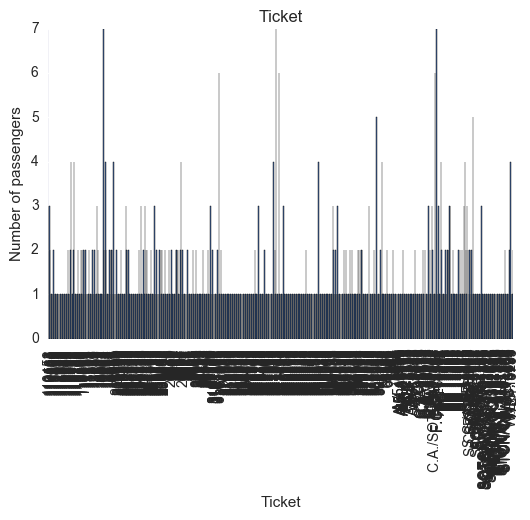

In [13]:
investigateColumn(fulldata, "Ticket")

# Group data by ticket number and count number of passengers per ticket number
pass_per_ticket = fulldata.groupby("Ticket").count()

# Print ticket numbers for tickets that are shared between 7 or more people
family_tickets = pass_per_ticket[pass_per_ticket["PassengerId"]>=7].index.values
print family_tickets

# Print data for "family" tickets
print fulldata[fulldata["Ticket"].isin(family_tickets)].sort_values(by="Ticket")

### The Sage family
More information on the Sage family can be found e.g. here: https://www.encyclopedia-titanica.org/the-sage-family-lost.html


## Fares


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


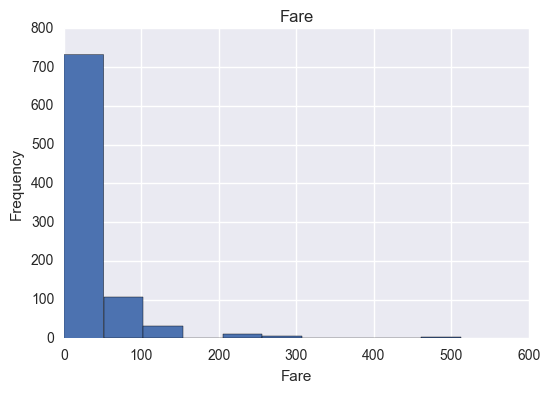

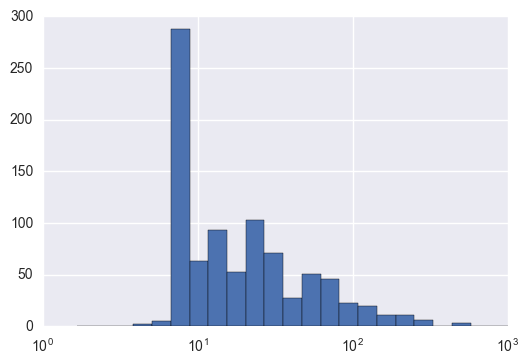

In [36]:
investigateColumn(fulldata, "Fare")

# Plot fare with a logarithmix x-axis
plt.figure()
fulldata["Fare"].hist(bins=np.logspace(0.1,3, 25))
plt.gca().set_xscale("log")


## Cabin
For only 204 of the passengers a cabin is provided in the data.

In [37]:
# Describe data in column
print fulldata["Cabin"].describe()

# Print first rows of column "Cabin"
print fulldata["Cabin"].head()

# Count number of passengers without an assigned cabin
n_cabin_missing = fulldata["Cabin"].isnull().sum()

print "Passengers without cabin in data:", n_cabin_missing
print "Passengers with cabin in data:", n_passengers - n_cabin_missing

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object
0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object
Passengers without cabin in data: 687
Passengers with cabin in data: 204


## Embarked
Most of the passengers embarked in Southampton (72 %). The fewest embarked in Queenstown (9 %). C stands for Cherbourg, Q for Queenstown and S for Southampton.

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


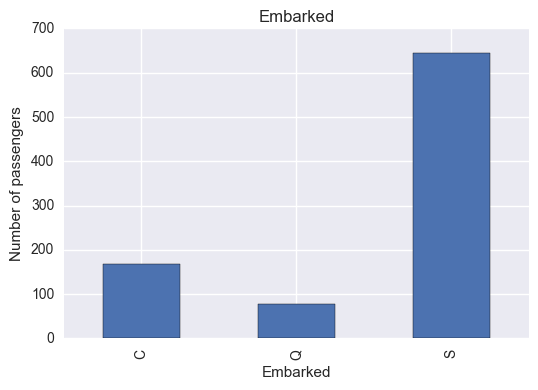

In [38]:
investigateColumn(fulldata, "Embarked")

# Data Cleaning and Enhancement
Some ages of the passengers are missing. During the rest of the analysis I keep that in mind but I do not want to give those people default ages since this would have an impact on calculated statistics.

It became also clear, that some people share the same ticket numbers. I want to check whether the fares are provided as fares per ticket or per passenger. 

I also want to extract family names from the passenger names. 

## Fares 
Some fares are 0. Some of those have a ticket "LINE". There are also seven passenger with regular ticket numbers with a 0 fare. As a cross-check I searched the internet for Mr. William Harrison. It seemed, that he has been a regular paying passenger in the first class with a presumed connection to the White Star Line. Also, Mr. William Parr seems to have a connection to the White Star Line. I also searched the internet for information on the owners of the "LINE" tickets. It seemed, that they are usual passenger. I might be that these 0 fares a due to missing data.

Most of the passengers paid less than 10 pound.

Source: https://www.encyclopedia-titanica.org/

In [40]:
fulldata[fulldata["Fare"]==0][["Ticket", "Fare", "Name", "Survived"]]

,Ticket,Fare,Name,Survived
179,LINE,0.0,"Leonard, Mr. Lionel",0
263,112059,0.0,"Harrison, Mr. William",0
271,LINE,0.0,"Tornquist, Mr. William Henry",1
277,239853,0.0,"Parkes, Mr. Francis ""Frank""",0
302,LINE,0.0,"Johnson, Mr. William Cahoone Jr",0
413,239853,0.0,"Cunningham, Mr. Alfred Fleming",0
466,239853,0.0,"Campbell, Mr. William",0
481,239854,0.0,"Frost, Mr. Anthony Wood ""Archie""",0
597,LINE,0.0,"Johnson, Mr. Alfred",0
633,112052,0.0,"Parr, Mr. William Henry Marsh",0


In [41]:
print "Mean:\n", fulldata.groupby("Pclass")["Fare"].mean()
print "\nStandard deviation:\n", fulldata.groupby("Pclass")["Fare"].std()
print "\nMinimum: \n", fulldata.groupby("Pclass")["Fare"].min()
print "\nMinimum: \n", fulldata.groupby("Pclass")["Fare"].max()

Mean:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Standard deviation:
Pclass
1    78.380373
2    13.417399
3    11.778142
Name: Fare, dtype: float64

Minimum: 
Pclass
1    0.0
2    0.0
3    0.0
Name: Fare, dtype: float64

Minimum: 
Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64


It seems, that the fare for some 3rd class tickets have been quite large. I want to check, whether these tickets are group or family tickets. I check that by looking at the ticket numbers within the 39.55 and 69.55 pound in the third class.

In [42]:
fulldata[(fulldata["Fare"]>fulldata.groupby("Pclass")["Fare"].max()[3]-30.) & (fulldata["Pclass"]==3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S


It seems to be the case, that the given fare is the full ticket price and not the ticket price per person. To correct for this I divide by the number of persons on the given ticket.

In [43]:
n_per_ticket = fulldata.groupby("Ticket", ).count()["PassengerId"]
fare_per_ticket = fulldata.groupby("Ticket").max()["Fare"]

fare_scaled = fare_per_ticket.divide(other=n_per_ticket)
fare_scaled = pd.DataFrame({"Fare_Scaled":fare_scaled, "Ticket":fare_scaled.index})
data_wrangled = fulldata.merge(fare_scaled, on="Ticket", how="left")

In [44]:
print "Mean:\n", data_wrangled.groupby("Pclass")["Fare_Scaled"].mean()
print "\nStandard deviation:\n", data_wrangled.groupby("Pclass")["Fare_Scaled"].std()
fares = data_wrangled.groupby("Pclass")["Fare_Scaled"]
print "n\Minimum w/o 0.: \n", data_wrangled.groupby("Pclass")["Fare_Scaled"].apply(lambda series: series[series>0].min())
print "\nMinimum: \n", data_wrangled.groupby("Pclass")["Fare_Scaled"].min()
print "\nMaximum: \n", data_wrangled.groupby("Pclass")["Fare_Scaled"].max()

Mean:
Pclass
1    43.650347
2    13.322599
3     8.086498
Name: Fare_Scaled, dtype: float64

Standard deviation:
Pclass
1    30.322236
2     5.648278
3     2.393032
Name: Fare_Scaled, dtype: float64
n\Minimum w/o 0.: 
Pclass
1    5.0000
2    5.2500
3    3.7111
Name: Fare_Scaled, dtype: float64

Minimum: 
Pclass
1    0.0
2    0.0
3    0.0
Name: Fare_Scaled, dtype: float64

Maximum: 
Pclass
1    221.7792
2     32.5000
3     22.5250
Name: Fare_Scaled, dtype: float64


In [45]:
data_wrangled[(data_wrangled["Fare_Scaled"]>data_wrangled.groupby("Pclass")["Fare_Scaled"].max()[3]-10.) & (fulldata["Pclass"]==3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Scaled
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,18.0000
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q,15.5000
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C,21.6792
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,14.4542
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S,14.5000
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S,14.5000
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S,16.1000
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S,22.0250
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,15.2458
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S,16.1000


There are still some high ticket prices for some passengers in the third class. This might be due to the fact, that the dataset does not contain data on all passengers. 

## Family names

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Surname, dtype: object
0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: Title, dtype: object
count     891
unique     17
top        Mr
freq      517
Name: Title, dtype: object
           PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  \
Surname                                                                  
Andersson            9         9       9     9    9    9      9      9   
Sage                 7         7       7     7    7    0      7      7   
Skoog                6         6       6     6    6    6      6      6   
Carter               6         6       6     6    6    6      6      6   
Goodwin              6         6       6     6    6    6      6      6   

           Ticket  Fare  Cabin  Embarked  Fare_Scaled  Title  
Surname                                                       
Andersson       9     9      0         9            9      9  
Sage            7     7

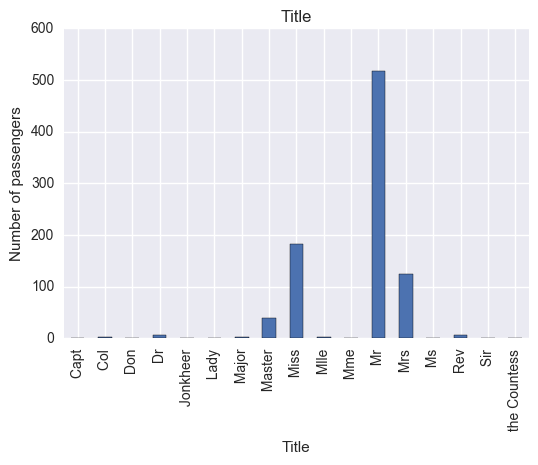

In [46]:
data_wrangled["Surname"] = data_wrangled["Name"].apply(lambda name: name.split(",")[0])
print data_wrangled["Surname"].head()
data_wrangled["Title"] = data_wrangled["Name"].apply(lambda name: name.split(",")[1].split(".")[0])
print data_wrangled["Title"].head()
investigateColumn(data_wrangled, "Title")
print data_wrangled.groupby("Surname").count().sort_values("PassengerId", ascending=False).head()

I want to check if the family size I observe by looking at the surnames correspond to the number of relatives.

In [47]:
data_wrangled[data_wrangled["Surname"]=="Andersson"][["Name", "Parch", "SibSp"]]

,Name,Parch,SibSp
13,"Andersson, Mr. Anders Johan",5,1
68,"Andersson, Miss. Erna Alexandra",2,4
119,"Andersson, Miss. Ellis Anna Maria",2,4
146,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,0
541,"Andersson, Miss. Ingeborg Constanzia",2,4
542,"Andersson, Miss. Sigrid Elisabeth",2,4
610,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",5,1
813,"Andersson, Miss. Ebba Iris Alfrida",2,4
850,"Andersson, Master. Sigvard Harald Elias",2,4


## Calculate family size

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: Familysize, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Scaled,Surname,Title,Familysize
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,9.935714,Sage,Master,11
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,9.935714,Sage,Miss,11
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,9.935714,Sage,Mr,11
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,9.935714,Sage,Mr,11
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,9.935714,Sage,Miss,11


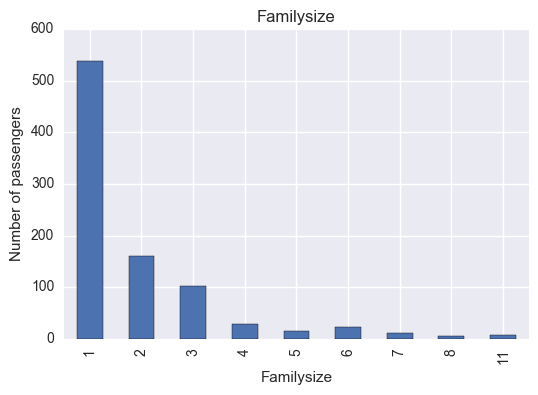

In [48]:
# Add number of parents, children, siblings and spouse and add one to account for the passenger himself
data_wrangled["Familysize"] = data_wrangled["Parch"] + data_wrangled["SibSp"] + 1

# investigate the new column
investigateColumn(data_wrangled, "Familysize")

# Show first entries
data_wrangled[data_wrangled["Familysize"]==11].head()

## Fares for different passenger classes

I plot the fare also with a logarithmic x axis to cover a wide region of fares while simultaneously differenciating smaller fares.

Mode of fares for 1st class: 26.86
Mode of fares for 2nd class: 11.66
Mode of fares for 3rd class:  6.68


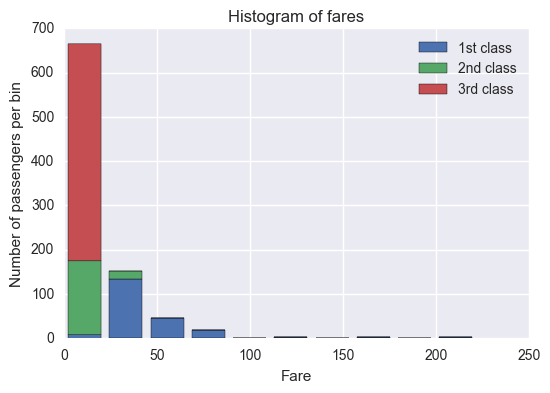

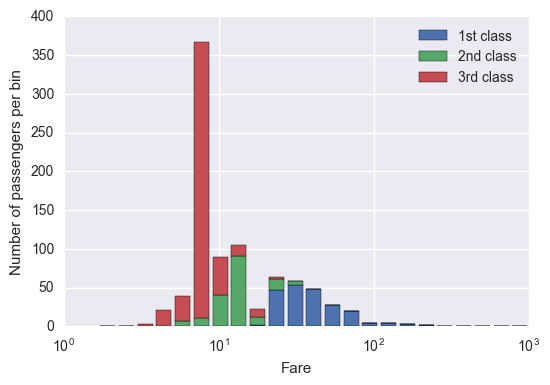

In [49]:
# Extract fares for the three passenger classes
fare_class_1 = data_wrangled[data_wrangled["Pclass"]==1]["Fare_Scaled"]
fare_class_2 = data_wrangled[data_wrangled["Pclass"]==2]["Fare_Scaled"]
fare_class_3 = data_wrangled[data_wrangled["Pclass"]==3]["Fare_Scaled"]

# Plot fares
plt.title('Histogram of fares')
plt.xlabel("Fare")
plt.ylabel("Number of passengers per bin")
plt.hist([fare_class_1, fare_class_2, fare_class_3], stacked=True, label=["1st class", "2nd class", "3rd class"])
plt.legend()
plt.figure()

# Plot fares on a logrithmix x-axis
a,b,c = plt.hist([fare_class_1, fare_class_2, fare_class_3], stacked=True, \
         bins=np.logspace(0.1,3, 25), label=["1st class", "2nd class", "3rd class"])
plt.gca().set_xscale("log")
plt.xlabel("Fare")
plt.ylabel("Number of passengers per bin")
plt.legend()

# Print out the modes for the logarithmic histogram
print "Mode of fares for 1st class:", "%5.2f" % (b[a[0].argmax()])
print "Mode of fares for 2nd class:", "%5.2f" % (b[a[1].argmax()])
print "Mode of fares for 3rd class:", "%5.2f" % (b[a[2].argmax()])



I conclude that the ticket price for the 3rd class started at 3.70 pound, but are mostly just around 7 pounds. Tickets for the 2nd class costed around 12 pounds. Ticket prices for the first class cover a wide range starting from 20 pounds to over 150 pounds. Surprisingly the ticket prices for the different classes overlap largely. This might be due an artifact in the data because ticket prices are not provided on a per passenger basis.

## Survival

In [50]:
# Print out correlation for numerical columns
fulldata.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


There is a slight correlation between age and survival. The largest correlation is obeserved between the passenger class and the survival flag. The second largest correlation for the survived flag is the correlationt with the passenger fare.

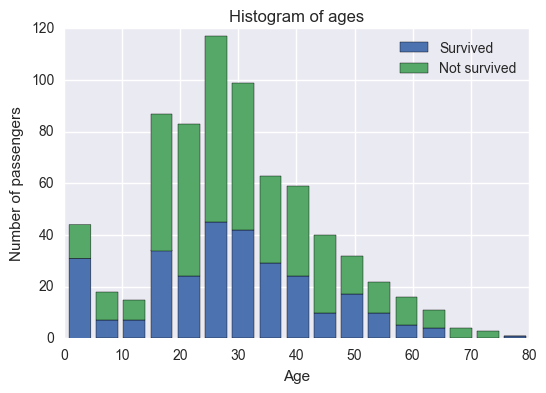

In [51]:
# Plot histogram of ages for survivors and victims
plt.title('Histogram of ages')
plt.xlabel("Age")
plt.ylabel("Number of passengers")
n_bins = int(math.ceil(fulldata["Age"].max()/5+1))
survivors = fulldata["Survived"]==1
#print len(fulldata[survivors==False]["Age"].fillna(-1))

plt.hist([fulldata[survivors]["Age"].dropna(), fulldata[survivors==False]["Age"].dropna()], \
         bins=n_bins, stacked=True, label=["Survived", "Not survived"])
plt.legend()

            N  Survival Rate
Age                         
(0, 5]     44       0.704545
(5, 10]    20       0.350000
(10, 15]   19       0.578947
(15, 20]   96       0.343750
(20, 25]  122       0.344262
(25, 30]  108       0.388889
(30, 35]   88       0.465909
(35, 40]   67       0.417910
(40, 45]   47       0.361702
(45, 50]   39       0.410256
(50, 55]   24       0.416667
(55, 60]   18       0.388889
(60, 65]   14       0.285714
(65, 70]    3       0.000000
(70, 75]    4       0.000000


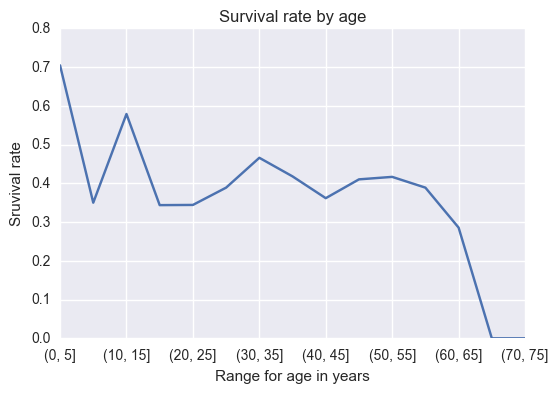

In [9]:
grouped_by_age = fulldata.groupby(pd.cut(fulldata["Age"], np.arange(0,fulldata["Age"].max(),5)))
survival_rate_by_age = pd.DataFrame()
survival_rate_by_age["N"] = grouped_by_age.count()["PassengerId"]
survival_rate_by_age["Survival Rate"] = grouped_by_age.mean()["Survived"]

ax = survival_rate_by_age["Survival Rate"].plot()

ax.set_title("Survival rate by age")
ax.set_ylabel("Sruvival rate")
ax.set_xlabel("Range for age in years")

print survival_rate_by_age

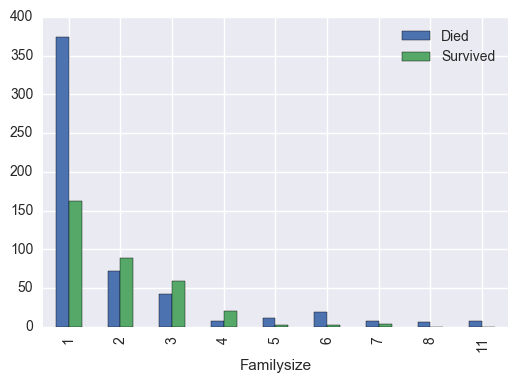

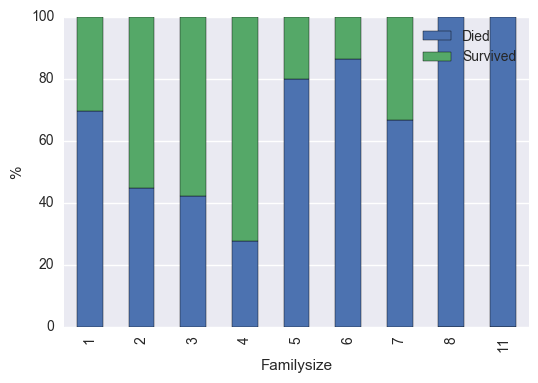

In [52]:
# Function to plot absolute numbers and precentages of survivors and victims in given classes defined by column colname
def plotSurvivalFor(colname):
    df = data_wrangled[["Survived", colname, "PassengerId"]].groupby(["Survived", colname]).count().unstack("Survived",fill_value=0)
    df.columns=["Died", "Survived"]
    df[[0,1]].plot(kind="bar")

    erg = df.apply(lambda row: row*100./float(sum(row)), axis=1)
    ax = erg[[0,1]].plot(kind="bar", stacked=True)
    ax.set_ylabel("%")

plotSurvivalFor("Familysize")

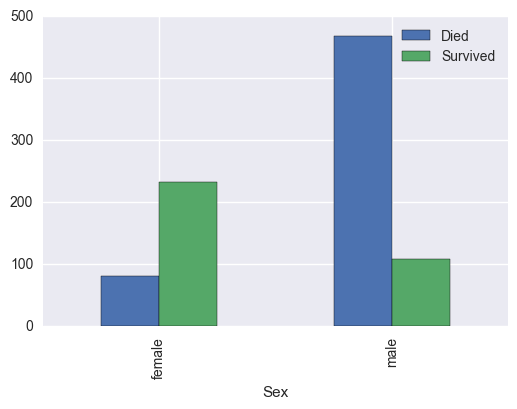

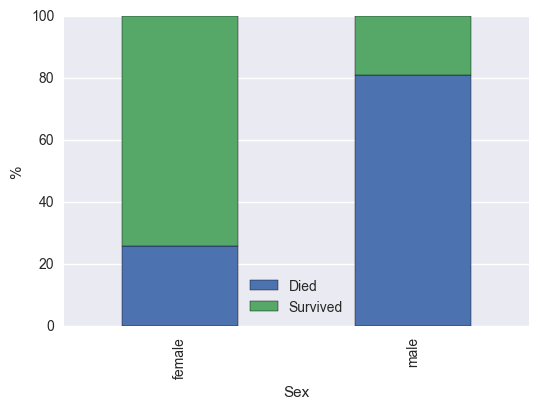

In [53]:
plotSurvivalFor("Sex")

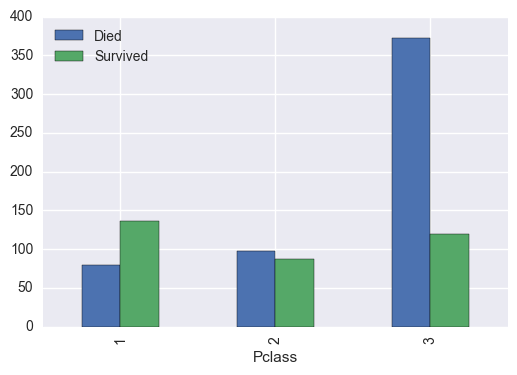

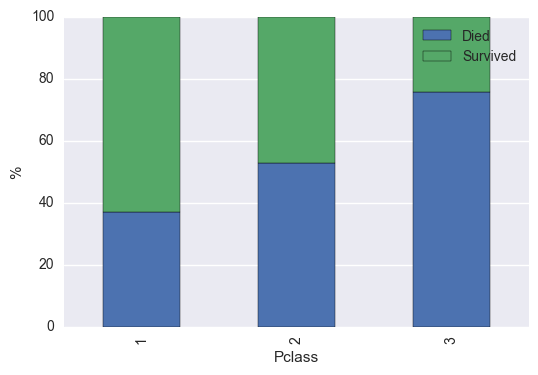

In [54]:
plotSurvivalFor("Pclass")

From the data is it obvious that several groups had a higher survival rate than others. Most of the men died, while more than 70% of the women survived. Over 60% of the passengers of the first class survived while almost 80% of the passengers of the third class died. Also, it seems, that passengers that travelled with a family of size four survived the disaster more often than those with a smaller or larger family on board or those, that travelled alone.